##Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from math import sqrt

##Loading Data 

In [2]:
df=pd.read_csv("Sales.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


##Exploring Dataset

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.shape

(92348, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92348 entries, 0 to 92347
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     92348 non-null  int64  
 1   Product_ID                  92348 non-null  object 
 2   Gender                      92348 non-null  object 
 3   Age                         92348 non-null  object 
 4   Occupation                  92348 non-null  int64  
 5   City_Category               92348 non-null  object 
 6   Stay_In_Current_City_Years  92348 non-null  object 
 7   Marital_Status              92348 non-null  int64  
 8   Product_Category_1          92348 non-null  int64  
 9   Product_Category_2          63492 non-null  float64
 10  Product_Category_3          28116 non-null  float64
 11  Purchase                    92347 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 8.5+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,9.234800e+04,92348.000000,92348.000000,92348.000000,63492.000000,28116.000000,92347.000000
mean,1.002728e+06,8.082796,0.409180,5.298014,9.853478,12.652796,9283.903787
std,1.748502e+03,6.552659,0.491685,3.732288,5.086079,4.128673,4960.510200
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001220e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5853.000000
50%,1.002454e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004217e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12037.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [8]:
df["Age"].value_counts()

26-35    36571
36-45    18316
18-25    17453
46-50     7295
51-55     6453
55+       3596
0-17      2664
Name: Age, dtype: int64

In [9]:
df["City_Category"].value_counts()

B    38834
C    28391
A    25123
Name: City_Category, dtype: int64

In [10]:
df.nunique()

User_ID                        5763
Product_ID                     3302
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      13718
dtype: int64

In [11]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

##Data Preprocessing

In [12]:
df.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            28856
Product_Category_3            64232
Purchase                          1
dtype: int64

In [13]:
df.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.312470
Product_Category_3            0.695543
Purchase                      0.000011
dtype: float64

In [14]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [15]:
Purchase = df['Purchase'].mode()[0]
df['Purchase'].fillna(Purchase,inplace=True)

In [16]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

##Data Visualization

In [17]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.026872,0.018086,0.004696,0.007113,-0.001432,0.005249
Occupation,-0.026872,1.000000,0.017210,-0.006035,0.005155,0.009294,0.015347
Marital_Status,0.018086,0.017210,1.000000,0.019006,0.004637,-0.007909,0.001788
Product_Category_1,0.004696,-0.006035,0.019006,1.000000,-0.038762,-0.390955,-0.314779
Product_Category_2,0.007113,0.005155,0.004637,-0.038762,1.000000,0.092452,0.040540
Product_Category_3,-0.001432,0.009294,-0.007909,-0.390955,0.092452,1.000000,0.285966
Purchase,0.005249,0.015347,0.001788,-0.314779,0.040540,0.285966,1.000000


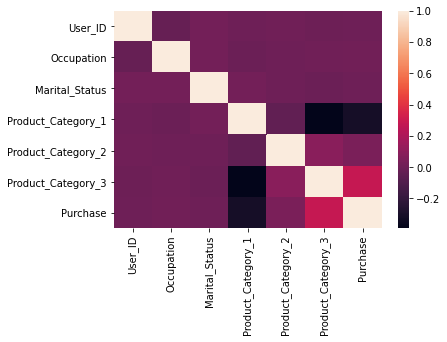

In [18]:
sns.heatmap(df.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


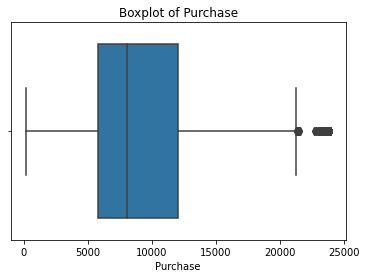

In [19]:
#Target variable
sns.boxplot(df["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [20]:
df["Gender"].value_counts()

M    69762
F    22586
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


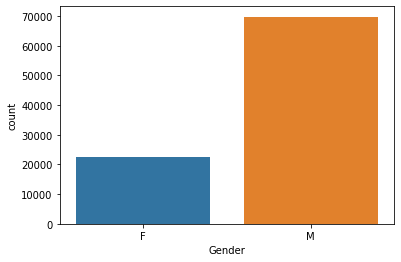

In [21]:
sns.countplot(df['Gender'])
plt.show()  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


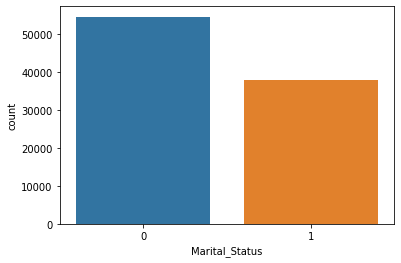

In [22]:
sns.countplot(df['Marital_Status'])
plt.show()
#Here 1 represents married and 0 represents not married

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


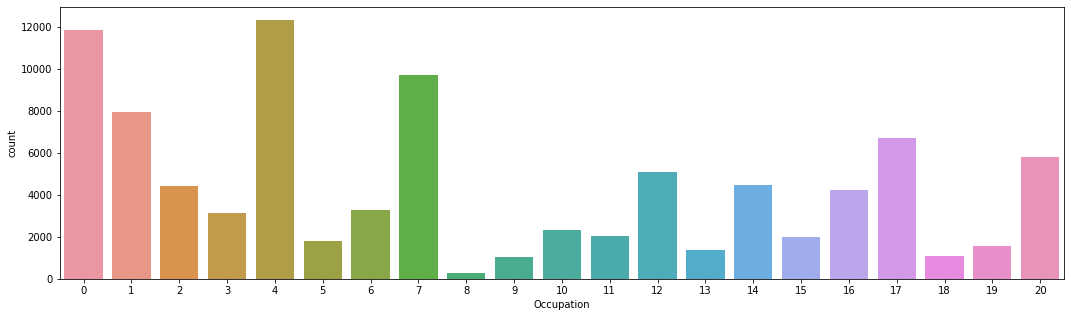

In [23]:
plt.figure(figsize=(18,5))
sns.countplot(df['Occupation'])
plt.show()

In [24]:
occup = pd.DataFrame(df.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9114.969743
1,8917.069770
2,8967.474588
3,9351.488727
4,9286.047812
5,9377.011526
6,9445.485339
7,9484.671097
8,9655.279851


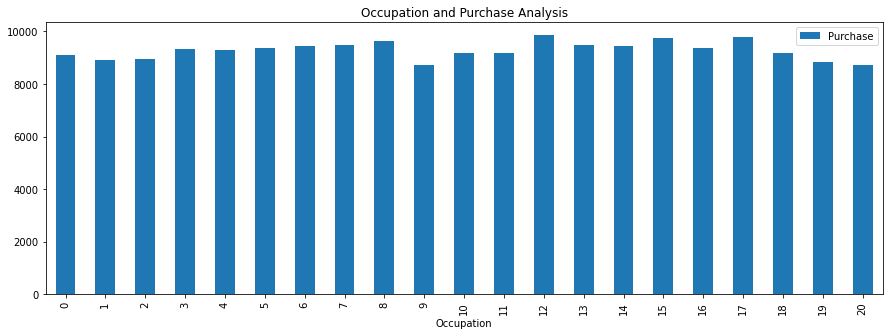

In [25]:
#Plotting graph of occupation vs purchases
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


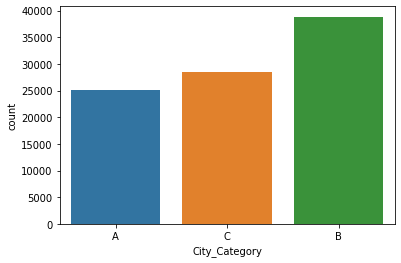

In [26]:
sns.countplot(df['City_Category'])
plt.show()
#City category B has made the most number of puchases.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


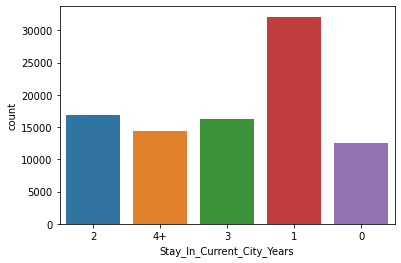

In [27]:
sns.countplot(df['Stay_In_Current_City_Years'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


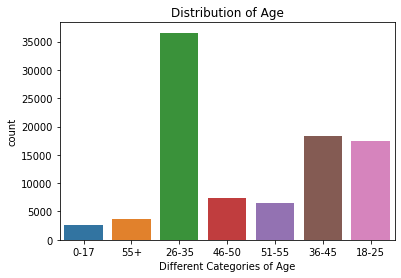

In [28]:
sns.countplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


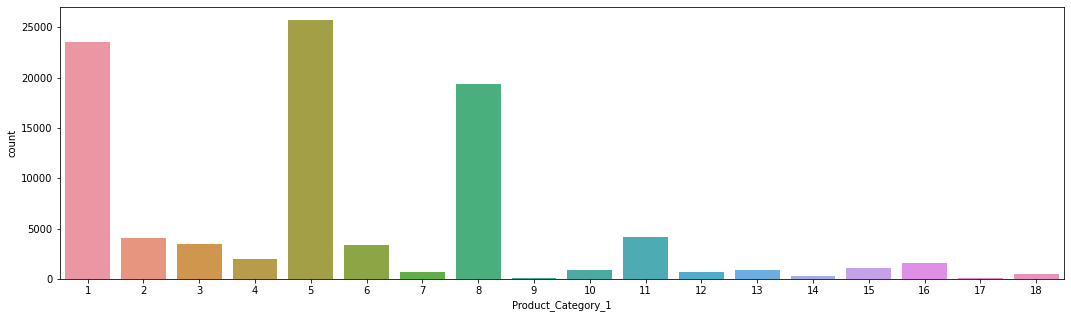

In [29]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_1'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


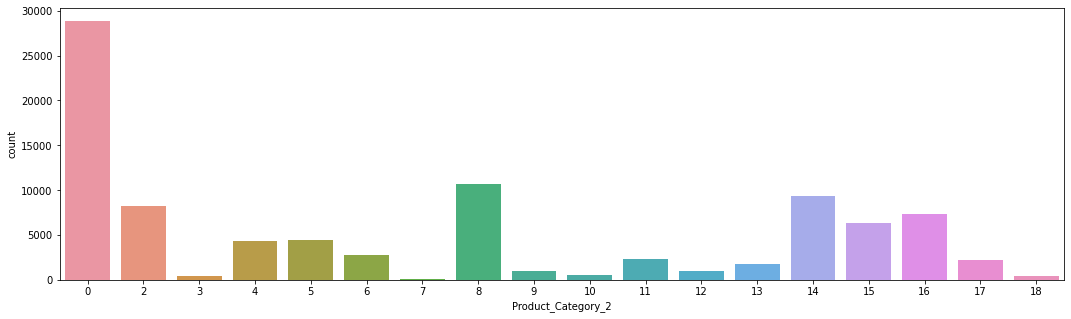

In [30]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_2'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


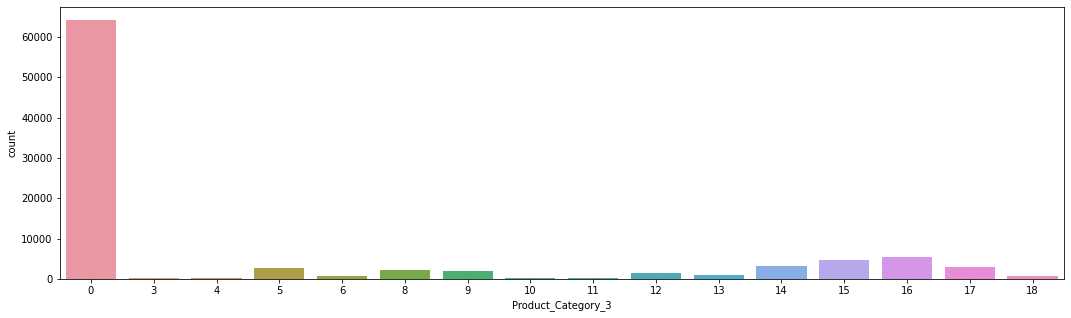

In [31]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_3'])
plt.show()

##Converting Categorical variables to Numerical variables

In [33]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [34]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057.0
4,1000002,P00285442,M,55+,16,C,4,0,8,0,0,7969.0


In [35]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [36]:
#For Age
df['Gender'] = le.fit_transform(df['Gender'])
df['Age'] = le.fit_transform(df['Age'])
df['City_Category'] = le.fit_transform(df['City_Category'])
df['Stay_In_Current_City_Years']=le.fit_transform(df['Stay_In_Current_City_Years'])

In [37]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370.0
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200.0
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422.0
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057.0
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969.0


In [38]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2              int64
Product_Category_3              int64
Purchase                      float64
dtype: object

##Dropping unnecessary columns

In [39]:
df.drop(["Marital_Status","Occupation","Product_ID"],axis=1,inplace=True)

In [40]:
df.head()

,User_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,0,0,0,2,3,0,0,8370.0
1,1000001,0,0,0,2,1,6,14,15200.0
2,1000001,0,0,0,2,12,0,0,1422.0
3,1000001,0,0,0,2,12,14,0,1057.0
4,1000002,1,6,2,4,8,0,0,7969.0


##Model Evaluation

In [41]:
X = df.drop("Purchase",axis=1)

In [42]:
y=df['Purchase']

##Feature Scaling


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
for col in X.columns:
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

##Splitting Train and Test

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (73878, 8)
X_test shape: (18470, 8)
y_train shape: (73878,)
y_test shape: (18470,)


##Linear Regressor

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [48]:
print("r2_score: ",r2_score(y_test,y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred))
print("Root mean squared error: ",sqrt(mean_squared_error(y_test,y_pred)))

r2_score:  0.14521050751188158
Mean absolute error: 3528.35
Root mean squared error:  4598.426606313956


##Decision Tree Regressor

In [49]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
dt_y_pred = regressor.predict(X_test)

In [50]:
print("r2_score: ",r2_score(y_test,dt_y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,dt_y_pred))
print("Root mean squared error: ",sqrt(mean_squared_error(y_test,dt_y_pred)))

r2_score:  0.392179986736677
Mean absolute error: 2697.23
Root mean squared error:  3877.6371688708086


##XGBoost Regressor

In [51]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0,n_estimators = 100,random_state=345, verbose = 1)
xgb_reg.fit(X_train, y_train)
xgb_y_pred = xgb_reg.predict(X_test)

[13:53:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [52]:
print("r2_score: ",r2_score(y_test,xgb_y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,xgb_y_pred))
print("Root mean squared error: ",sqrt(mean_squared_error(y_test,xgb_y_pred)))

r2_score:  0.6534991396196442
Mean absolute error: 2194.45
Root mean squared error:  2927.7354440824865


#####From above we can observe that RMSE(Root Mean Square Error) of XG Boost  Regressor is less i.e., 2812,so XG Boost Regressor is best model for this project

##Hyperparamter Tuning

In [53]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

In [54]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [55]:
xgb_tune = XGBRegressor(verbosity = 0, random_state = 42)

In [56]:
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, random_state = 42)

In [57]:
xgb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alpha...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamm

In [58]:
xgb_cv.best_score_

0.6532401169298527

In [59]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': '0.5',
 'max_depth': 7,
 'min_child_weight': 61}

In [78]:
xgb_best = XGBRegressor(colsample_bytree = 0.4, gamma = 0.2, learning_rate = 0.5, max_depth = 7, min_child_weight = 61, verbosity = 0, random_state = 42)

In [79]:
xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=7, min_child_weight=61, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [80]:
Y_pred_xgb_best = xgb_best.predict(X_test)

In [81]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_xgb_best)))
print("R2 score:", r2_score(y_test, Y_pred_xgb_best))

XGB regression: 
RMSE: 2887.968500412337
R2 score: 0.6628481396382915


##Feature Importance

In [82]:
# getting weights of all the features used in the data
feature_importance = xgb_reg.feature_importances_
feature_importance

array([0.01496846, 0.01122454, 0.01431998, 0.02667826, 0.01306206,
       0.8762853 , 0.02058712, 0.0228742 ], dtype=float32)

In [83]:
# features used
columns = list(X_train.columns)
columns

['User_ID',
 'Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [84]:
feature_importance_value = []
for i in range(len(feature_importance)):
    feature_importance_value.append(round(feature_importance[i],5))
feature_importance_value

[0.01497, 0.01122, 0.01432, 0.02668, 0.01306, 0.87629, 0.02059, 0.02287]

In [85]:
# making a dataframe
feature_importance_df = pd.DataFrame({"Features":columns,
                                     "Values":feature_importance_value })
feature_importance_df

,Features,Values
0,User_ID,0.01497
1,Gender,0.01122
2,Age,0.01432
3,City_Category,0.02668
4,Stay_In_Current_City_Years,0.01306
5,Product_Category_1,0.87629
6,Product_Category_2,0.02059
7,Product_Category_3,0.02287


In [86]:
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
5,Product_Category_1,0.87629
3,City_Category,0.02668
7,Product_Category_3,0.02287
6,Product_Category_2,0.02059
0,User_ID,0.01497
2,Age,0.01432
4,Stay_In_Current_City_Years,0.01306
1,Gender,0.01122


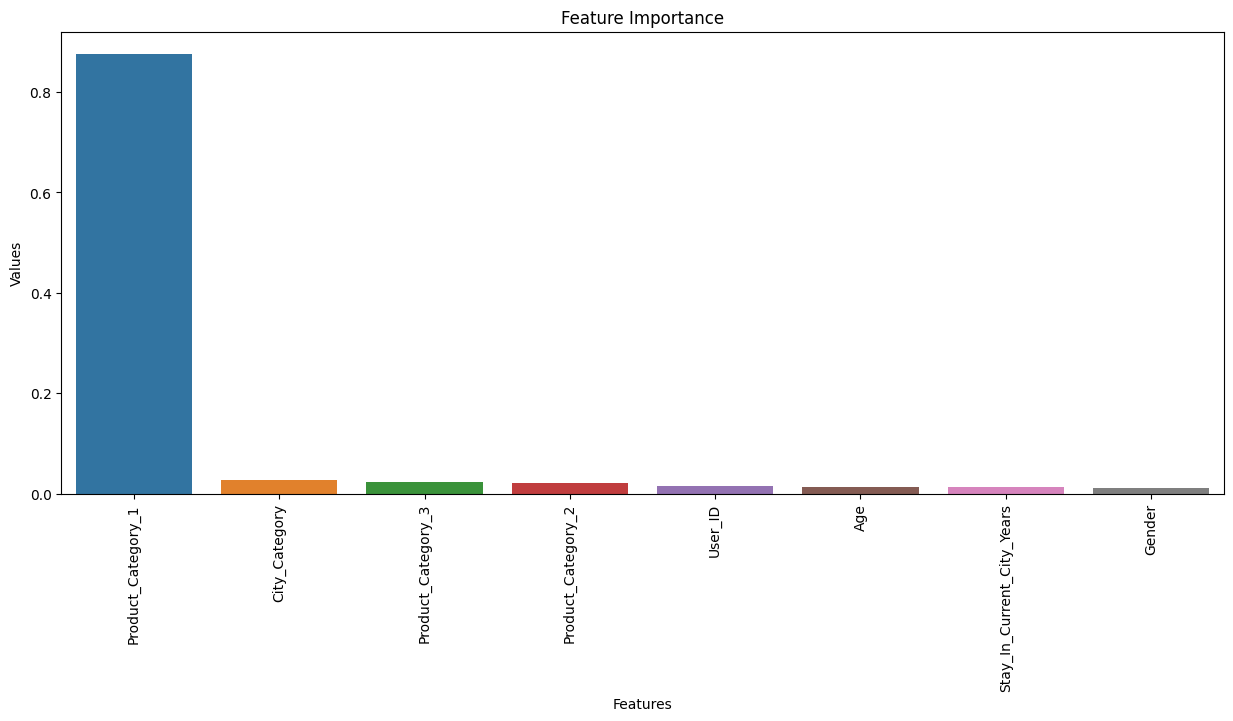

In [87]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()